1.   [Scikit-learn/sklearn](https://scikit-learn.org/stable/)
2.   [Tensorflow](https://www.tensorflow.org/?hl=es)
3.   [Keras](https://keras.io/)
4.   [Pytorch](https://pytorch.org/)
5.   [Nltk](https://www.nltk.org/)
6.   [Spacy](https://spacy.io/)

Puede encontrar mas informacion y librerias utiles en [este blog](https://www.iartificial.net/librerias-de-python-para-machine-learning/#TensorFlow)

Lecturas recomendadas:


1.   [Word2vec](https://towardsdatascience.com/word2vec-research-paper-explained-205cb7eecc30)
2.   [Transformers](https://compvis.github.io/taming-transformers/)

3. [como funciona word2vec](https://datascientest.com/es/nlp-word-embedding-word2vec-es)



#Vectorizacion de palabras

Para poder procesar una palabra es necesario convertirla en algun objeto matematico que permita hacer esto, la opcion mas sencilla y util son los vectores, estos se crean siguiendo el algoritmo Word2vec de forma que cada componente del vector es una caracteristica de lo que conceptualmente significa una palabra, los humanos podemos hacer esto de forma sencilla, simplemente asociar conceptos a palabras.


<center>
  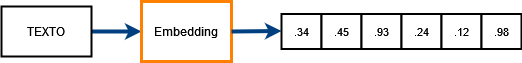</center>

In [ ]:
!pip install -U spacy
!python -m spacy download es_core_news_lg
import spacy
import es_core_news_lg
nlp = es_core_news_lg.load()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.0 MB 8.7 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
#@title Vector de una palabra
Palabra = "Mujer" #@param {type:"string"}
print(nlp.vocab[Palabra].vector)
nlp.vocab[Palabra].vector.shape

[-1.6986   -0.47477   0.052872  1.6822   -2.1922   -0.33053  -2.8451
  2.8542   -1.1272    0.3726   -1.1565   -1.4455   -0.026307 -0.21483
 -1.6063   -2.9019   -1.6247   -1.1644   -3.2589    0.054047 -2.3966
  2.6162   -1.0554    2.887     0.89608   0.39347  -0.84909   1.9269
 -0.87403   1.4195   -0.17229  -3.1222    0.13586  -3.0757   -0.259
  0.52147   1.0222   -0.95234  -2.5224   -2.2281   -0.34086   1.2405
  0.41894  -0.24196   0.73332   0.507    -1.6326   -1.0542    0.68955
 -1.9894   -0.36714   2.9487    0.9443   -3.4951    0.061863  0.30056
 -1.2533   -3.1818    0.68235  -1.2787    3.8869    1.4787   -1.716
 -1.3402    0.17168  -0.37193  -1.1219    4.3357    1.4447    1.6047
  1.8129    1.4436   -3.3065    0.35     -4.6366    0.93072  -1.999
 -1.9677   -1.5412   -0.66011   0.18278  -0.15808   0.99018  -0.1925
  3.3131   -1.6629   -0.057501 -1.641    -2.6101    1.6045    3.3298
 -2.3918   -0.66816  -2.9066    2.1528   -2.5794    1.1919    0.57717
 -1.9721    0.018732  3.1997    1

(300,)

<center>
  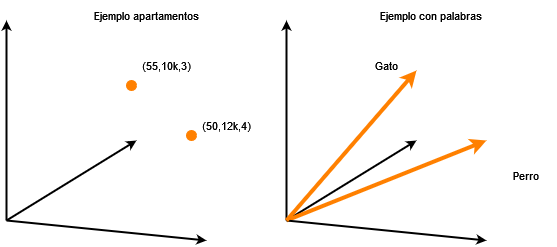
  </center>

Ya que son vectores se pueden hacer operaciones matematicas, hay una operacion muy conocida:
$$Rey-Hombre+Mujer=Reina$$
Esta operacion resulta interesante ya que significa que hay una relacion conceptual entre diferentes tipos de palabras.

tambien se puede hallar un parecido entre palabras:

In [ ]:
A=nlp.vocab["Rey"].vector-nlp.vocab["Hombre"].vector+nlp.vocab["Mujer"].vector
B=nlp.vocab["Reina"].vector
import numpy as np
print((A@B)/(np.linalg.norm(A)*np.linalg.norm(B)))

0.7030733


In [ ]:
#@title Similitud entre dos palabras
Palabra1 = "reina" #@param ["hombre", "mujer", "rey", "reina"] {allow-input: true}
Palabra2= "rey" #@param ["hombre", "mujer", "rey", "reina"] {allow-input: true}

print(nlp.vocab[Palabra1].similarity(nlp.vocab[Palabra2]))



0.6265181303024292


Incluso el mismo metodo puede determinar si dos frases u oraciones son similares o diferentes

In [ ]:
#@title Similitud entre dos frases u oraciones
Palabra1 = "El cielo es azul" #@param ["La similitud coseno es una forma de obtener informacion de cercania entre vectores"] {allow-input: true}
Palabra2 = "Esta despejado el cielo" #@param ["La similitud coseno es una forma de conocer el angulo entre los vectores"] {allow-input: true}

p1 = nlp(Palabra1)
p2 = nlp(Palabra2)
p1.similarity(p2)

0.5392067534075368

#Clasificacion de texto basica
La clasificacion de texto es uno de los usos del procesamiento del lenguaje natural, es util para conocer el contenido de una oracion por ejemplo en un chatbot para conocer que pide el usuario o en un correo para determinar si es spam, hay otras aplicaciones que empiezan a juntar diferentes de estos modelos para formar modelos como los proyectos **Dall-e** y **VQGAN+CLIP**, este ultimo es un modelo que analiza el texto para generar una imagen e incluso se ha visto en **Github copilot** una IA que puede autocompletar codigo o generar codigo con comentarios.

El clasificador que se usará es el mostrado por [Tensorflow](https://www.tensorflow.org/tutorials/keras/text_classification?hl=es) para clasificar frases como positivas o negativas.

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')#untar se pone true si el archivo se tiene que descomprimir

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
print(os.listdir(train_dir))

['unsupBow.feat', 'pos', 'labeledBow.feat', 'urls_pos.txt', 'urls_neg.txt', 'neg', 'unsup', 'urls_unsup.txt']


In [ ]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(4):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

In [ ]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),#<- Re escape escapa los signos de puntuación de forma que por ejemplo un \ será convertido a \\
                                  '')#<- Elimina los signos de puntuación

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE#<- Autotune precarga datos de entrenamiento y ajusta la cantidad para ahorrar tiempo

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
embedding_dim = 16

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
epochs = 20
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
625/625 [==============================] - 11s 12ms/step - loss: 0.6646 - binary_accuracy: 0.6926 - val_loss: 0.6162 - val_binary_accuracy: 0.7724
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5501 - binary_accuracy: 0.8015 - val_loss: 0.4992 - val_binary_accuracy: 0.8208
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4452 - binary_accuracy: 0.8438 - val_loss: 0.4206 - val_binary_accuracy: 0.8468
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3792 - binary_accuracy: 0.8674 - val_loss: 0.3741 - val_binary_accuracy: 0.8608
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3354 - binary_accuracy: 0.8795 - val_loss: 0.3449 - val_binary_accuracy: 0.8664
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3056 - binary_accuracy: 0.8888 - val_loss: 0.3258 - val_binary_accuracy: 0.8716
Epoch 7/20
625/625 [==============================] - 3s 4ms/s

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)


In [ ]:
#@title Evaluar el modelo { run: "auto", vertical-output: true }
texto = "Excelent movie" #@param ["Excelent movie", "Terrible..."] {allow-input: true}

export_model.predict([texto])[0]

array([0.0378819], dtype=float32)

#Clasificacion de texto para obtener el contexto de una frase

Ejecutar la siguiente celda si no se tiene un json para hacer la ejecucion

In [ ]:
datos=open("./datos.json","w")
datos.write("{\"contenido\":[{\"tag\":\"saludo\",\"patrones\":[\"Hola\",\"Buen dia\",\"Buenos dias\",\"Buenas tardes\"]},"+
            "{\"tag\":\"despedida\",\"patrones\":[\"Adios\",\"Hasta luego\",\"Nos vemos\"]},"+
            "{\"tag\":\"servicio\",\"patrones\":[\"¿que servicios ofrecen?\",\"¿que productos ofrecen\",\"¿que hacen ustedes?\",\"¿que productos venden?\",\"¿que venden?\",\"¿que hace la empresa?\",\"¿que tienen a la venta?\"]},"+
            "{\"tag\":\"errores\",\"patrones\":[\"quisiera hacer una queja\",\"tengo problemas con esto\",\"no funciona\",\"hay problemas con esto\",\"podria comunicarme con alguien para solucionar mi problema\",\"tengo un problema\",\"aqui hay un error\",\"hay un fallo\",\"Me fallo\",\"tengo un error con esto\",\"tengo problemas\",\"quisiera quejarme por un problema\",\"tengo un inconveniente\",\"quisiera quejarme por un inconveniente\",\"quiero quejarme por un inconveniente\"]},"+
            "{\"tag\":\"trabajo\",\"patrones\":[\"¿Hay alguna oferta de trabajo?\",\"¿quisiera trabajar?\",\"¿ofrecen trabajo?\",\"tiene ofertas de trabajo\",\"Tiene algun empleo disponible\",\"ofrece algun empleo\"]}]}")
datos.close()

In [ ]:
!pip install nltk
!pip install tensorflow
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 4.8 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=f48ec2b1b958bb32d9e2873d46d14918f1295d58eaa0238dcb73d2dfe55653f4
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
import numpy as np
import tflearn
import tensorflow as tf
import json
import random

In [ ]:
stemmer=LancasterStemmer()
with open("datos.json",encoding="utf-8") as archivo:
  datos=json.load(archivo)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
palabras=[]
tags=[]
auxX=[]
auxY=[]

for contenido in datos["contenido"]:
  for patrones in contenido["patrones"]:
    auxPalabra=nltk.word_tokenize(patrones)
    palabras.extend(auxPalabra)
    auxX.append(auxPalabra)
    auxY.append(contenido["tag"])

    if contenido["tag"] not in tags:
      tags.append(contenido["tag"])

palabras=[stemmer.stem(w.lower()) for w in palabras if (w!="?" and w!="¿")]
palabras=sorted(list(set(palabras)))
print(set(palabras))
tags=sorted(tags)
print(palabras)

entrenamiento=[]
salida=[]
salidaVacia=[0 for _ in range(len(tags))]

for x, documento in enumerate(auxX):
  cub=[]
  auxPalabra=[stemmer.stem(w.lower()) for w in documento]
  for w in palabras:
      cub.append(1) if w in auxPalabra else cub.append(0)
  filaSalida=salidaVacia[:]
  filaSalida[tags.index(auxY[x])]=1
  entrenamiento.append(cub)
  salida.append(filaSalida)
entrenamiento=np.array(entrenamiento)
salida=np.array(salida)

{'hol', 'por', 'de', '¿hay', 'adio', 'tengo', 'comunicarm', 'tien', 'tard', 'empres', 'par', 'problema', 'mi', 'solucion', 'quej', 'inconveny', 'oferta', 'quejarm', 'trabajo', '¿quisiera', 'con', 'alguy', 'me', 'problem', 'nos', 'er', 'hac', 'empleo', 'servicio', 'vent', 'la', 'podr', 'aqu', 'quisier', 'quiero', 'esto', 'trabaj', 'ofrec', 'vend', 'hay', 'algun', 'un', 'producto', 'dia', '¿que', 'ofert', 'a', 'no', 'hast', 'fallo', 'funcion', 'bueno', 'ust', 'vemo', 'buena', '¿ofrecen', 'dispon', 'buen', 'luego'}
['a', 'adio', 'algun', 'alguy', 'aqu', 'buen', 'buena', 'bueno', 'comunicarm', 'con', 'de', 'dia', 'dispon', 'empleo', 'empres', 'er', 'esto', 'fallo', 'funcion', 'hac', 'hast', 'hay', 'hol', 'inconveny', 'la', 'luego', 'me', 'mi', 'no', 'nos', 'ofert', 'oferta', 'ofrec', 'par', 'podr', 'por', 'problem', 'problema', 'producto', 'quej', 'quejarm', 'quiero', 'quisier', 'servicio', 'solucion', 'tard', 'tengo', 'tien', 'trabaj', 'trabajo', 'un', 'ust', 'vemo', 'vend', 'vent', '¿hay

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

red=tflearn.input_data(shape=[None,len(entrenamiento[0])])
red=tflearn.fully_connected(red,15)
red=tflearn.fully_connected(red,15)

red=tflearn.fully_connected(red,len(salida[0]),activation="softmax")

red=tflearn.regression(red)
modelo=tflearn.DNN(red)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
modelo.fit(entrenamiento,salida,n_epoch=1000,batch_size=10)

Training Step: 3999  | total loss: 0.02312 | time: 0.018s
| Adam | epoch: 1000 | loss: 0.02312 -- iter: 30/35
Training Step: 4000  | total loss: 0.02260 | time: 0.023s
| Adam | epoch: 1000 | loss: 0.02260 -- iter: 35/35
--


In [ ]:
#@title Prueba del modelo { run: "auto", vertical-output: true }
texto = "" #@param {type:"string"}
entrada=texto
cub=[0 for _ in range(len(palabras))]
entradaProcesada=nltk.word_tokenize(entrada)
entradaProcesada=[stemmer.stem(palabra.lower()) for palabra in entradaProcesada]
for palabraIndividual in entradaProcesada:
  for i,palabra in enumerate(palabras):
    if palabra==palabraIndividual:
      cub[i]=1
    else:
      cub[i]=0
resultados=modelo.predict([np.array(cub)])
print(resultados)
print(tags)
resultIndice=np.argmax(resultados)
tag=tags[resultIndice]
print(tag)

respuestas={
    "despedida":"adios",
    "errores":"lo sentimos",
    "saludo":"hola",
    "servicio":"...",
    "trabajo":".,."
}
print(respuestas.get(tag))

[[0.10683201 0.46585268 0.25528044 0.03847834 0.13355651]]
['despedida', 'errores', 'saludo', 'servicio', 'trabajo']
errores
lo sentimos
